In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from random import random
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.metrics import mean_squared_error, categorical_crossentropy, mse

from sklearn.metrics import confusion_matrix
import itertools

2024-01-03 19:44:49.556338: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-03 19:44:49.558244: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-03 19:44:49.583844: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 19:44:49.583875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 19:44:49.584513: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Making the data

We need to replicate the following function
$$f(x) = e^{-x^2}$$

with $x, y \epsilon [0,1]$

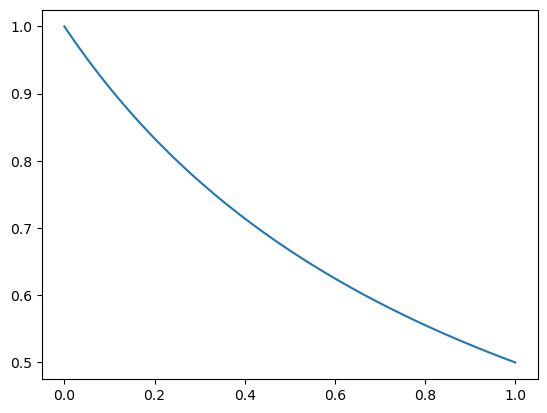

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# f = lambda x: np.exp(-(x-0.5)**2)
def f(x):
    return 1/(1+x)

# a look at how data looks
x_real = np.linspace(0,1,100)
y_real = f(x_real)
plt.plot(x_real, y_real)

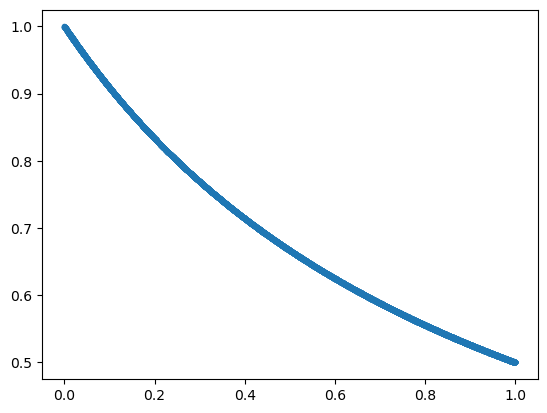

In [8]:
#making random data
N = 10000 #total batch size
train_sample = np.random.random(N)
train_label = f(train_sample)
plt.plot(train_sample, train_label, '.')

In [9]:
#making a neural network
layer0 = Dense(16, input_shape=(1,), activation='selu')
layer1 = Dense(16, activation='selu')
layer2 = Dense(16, activation='selu')
layer3 = Dense(1, activation='selu')

model = Sequential([layer0,layer2,layer1, layer3])

In [10]:
model.compile(optimizer=RMSprop(learning_rate=1e-4),loss='mse')

In [11]:
model.fit(x=train_sample, y=train_label, shuffle=True,batch_size=10, epochs=30, verbose=1)

Epoch 1/30
1000/1000 [==============================] - 1s 977us/step - loss: 0.1285
Epoch 2/30
1000/1000 [==============================] - 1s 954us/step - loss: 2.4534e-05
Epoch 3/30
1000/1000 [==============================] - 1s 968us/step - loss: 2.0795e-05
Epoch 4/30
1000/1000 [==============================] - 1s 977us/step - loss: 1.9210e-05
Epoch 5/30
1000/1000 [==============================] - 1s 952us/step - loss: 1.8202e-05
Epoch 6/30
1000/1000 [==============================] - 1s 967us/step - loss: 1.7589e-05
Epoch 7/30
1000/1000 [==============================] - 1s 1ms/step - loss: 1.7290e-05
Epoch 8/30
1000/1000 [==============================] - 1s 1ms/step - loss: 1.7204e-05
Epoch 9/30
1000/1000 [==============================] - 1s 1ms/step - loss: 1.6809e-05
Epoch 10/30
1000/1000 [==============================] - 1s 1ms/step - loss: 1.6488e-05
Epoch 11/30
1000/1000 [==============================] - 1s 1ms/step - loss: 1.6489e-05
Epoch 12/30
1000/1000 [==========

In [9]:
model.fit(x=train_sample, y=train_label,validation_split=0.1, shuffle=True,batch_size=20, epochs=30, verbose=1)

Epoch 1/30
450/450 [==============================] - 2s 3ms/step - loss: 1.4143e-05 - val_loss: 2.0685e-05
Epoch 2/30
450/450 [==============================] - 1s 2ms/step - loss: 1.4226e-05 - val_loss: 1.8787e-06
Epoch 3/30
450/450 [==============================] - 1s 2ms/step - loss: 1.3820e-05 - val_loss: 4.4098e-06
Epoch 4/30
450/450 [==============================] - 1s 2ms/step - loss: 1.3907e-05 - val_loss: 1.2135e-05
Epoch 5/30
450/450 [==============================] - 1s 2ms/step - loss: 1.4274e-05 - val_loss: 2.4110e-06
Epoch 6/30
450/450 [==============================] - 1s 2ms/step - loss: 1.4007e-05 - val_loss: 2.1650e-06
Epoch 7/30
450/450 [==============================] - 1s 2ms/step - loss: 1.4122e-05 - val_loss: 5.7351e-06
Epoch 8/30
450/450 [==============================] - 1s 2ms/step - loss: 1.4002e-05 - val_loss: 1.1089e-05
Epoch 9/30
450/450 [==============================] - 1s 2ms/step - loss: 1.3313e-05 - val_loss: 1.1973e-05
Epoch 10/30
450/450 [=======

In [11]:
#testing 
test_data = np.linspace(0,1,100)

In [12]:
test_output_3 = model.predict(test_data, batch_size=10)

10/10 [==============================] - 0s 2ms/step


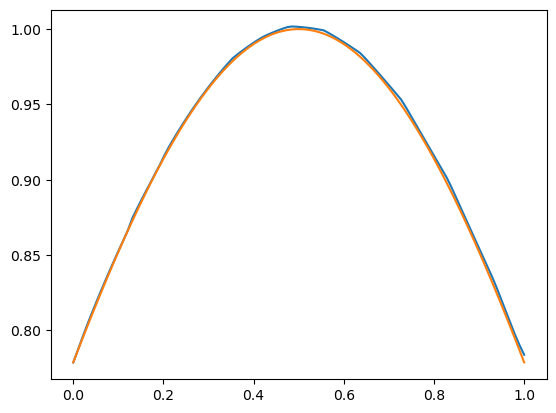

In [13]:
plt.plot(test_data, test_output_3)
plt.plot(test_data, f(test_data))